In [1]:
import pandas as pd

In [6]:
raw = pd.read_csv('./babyNamesUS.csv')
raw

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
...,...,...,...,...,...
1048570,FL,F,1993,Francis,8
1048571,FL,F,1993,Francisca,8
1048572,FL,F,1993,Gillian,8
1048573,FL,F,1993,Gisela,8


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   StateCode    1048575 non-null  object
 1   Sex          1048575 non-null  object
 2   YearOfBirth  1048575 non-null  int64 
 3   Name         1048575 non-null  object
 4   Number       1048575 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 40.0+ MB


In [8]:
raw.head()

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [9]:
raw.tail()

,StateCode,Sex,YearOfBirth,Name,Number
1048570,FL,F,1993,Francis,8
1048571,FL,F,1993,Francisca,8
1048572,FL,F,1993,Gillian,8
1048573,FL,F,1993,Gisela,8
1048574,FL,F,1993,Gretchen,8


In [12]:
# 가장 흔한, 많이 사용된 이름
df = raw.pivot_table(index = 'Name', values = 'Number', aggfunc = 'sum') # index, value, aggfunc 필수
df

,Number
Name,
Aadan,18
Aaden,855
Aadhav,14
Aadhya,188
Aadi,116
...,...
Zylah,36
Zyler,38
Zyon,97


In [17]:
df.sort_values(by = 'Number', ascending= False).head(10)

,Number
Name,
Michael,729890
James,696321
Robert,677403
John,673291
David,617946
Mary,520762
William,519198
Richard,383524
Christopher,379723


shift + tab
함수의 파라미터들을 확인할 수 있다.

In [21]:
# 남여 top10
df2 = raw.pivot_table(index = ['Name', 'Sex'], values = 'Number', aggfunc = 'sum') 
df2

Number
Name   Sex        
Aadan  M        18
Aaden  M       855
Aadhav M        14
Aadhya F       188
Aadi   M       116
...            ...
Zyler  M        38
Zyon   F         6
       M        91
Zyra   F        23
Zyrah  F         5

[22798 rows x 1 columns]

각각의 파라미터들은 하나의 값만 받지만 여러값을 넣고 싶을 때 [] 리스트로 묶어서 줄수 있다.

In [23]:
df3 = raw.pivot_table(index = 'Name', columns ='Sex', values = 'Number', aggfunc = 'sum') 
df3

Sex,F,M
Name,,
Aadan,NaN,18.0
Aaden,NaN,855.0
Aadhav,NaN,14.0
Aadhya,188.0,NaN
Aadi,NaN,116.0
...,...,...
Zylah,36.0,NaN
Zyler,NaN,38.0
Zyon,6.0,91.0


columns에는 제일 마지막 작업일 때만 이슈가 생기지 않는다. 이왕이면 리스트로 만들어서 사용하자

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22798 entries, ('Aadan', 'M') to ('Zyrah', 'F')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Number  22798 non-null  int64
dtypes: int64(1)
memory usage: 407.6+ KB


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20815 entries, Aadan to Zyrah
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       14140 non-null  float64
 1   M       8658 non-null   float64
dtypes: float64(2)
memory usage: 487.9+ KB


In [26]:
# 남자이름 top10
df3.sort_values(by = 'F', ascending = False).head()

Sex,F,M
Name,,
Mary,519443.0,1319.0
Jennifer,325383.0,773.0
Elizabeth,273414.0,607.0
Patricia,257008.0,476.0
Linda,249999.0,324.0


In [27]:
df3['M']

Name
Aadan      18.0
Aaden     855.0
Aadhav     14.0
Aadhya      NaN
Aadi      116.0
          ...  
Zylah       NaN
Zyler      38.0
Zyon       91.0
Zyra        NaN
Zyrah       NaN
Name: M, Length: 20815, dtype: float64

In [28]:
df3[['M', 'F']]

Sex,M,F
Name,,
Aadan,18.0,NaN
Aaden,855.0,NaN
Aadhav,14.0,NaN
Aadhya,NaN,188.0
Aadi,116.0,NaN
...,...,...
Zylah,NaN,36.0
Zyler,38.0,NaN
Zyon,91.0,6.0


In [29]:
df3.index

Index(['Aadan', 'Aaden', 'Aadhav', 'Aadhya', 'Aadi', 'Aadit', 'Aaditya',
       'Aadvik', 'Aadya', 'Aadyn',
       ...
       'Zykeria', 'Zykeriah', 'Zykerria', 'Zykira', 'Zyla', 'Zylah', 'Zyler',
       'Zyon', 'Zyra', 'Zyrah'],
      dtype='object', name='Name', length=20815)

In [32]:
# 남자이름 top10 이름만 보자
top_f_name = df3.sort_values(by = 'F', ascending = False).head(10).index
top_f_name

Index(['Mary', 'Jennifer', 'Elizabeth', 'Patricia', 'Linda', 'Jessica',
       'Barbara', 'Sarah', 'Michelle', 'Ashley'],
      dtype='object', name='Name')

In [45]:
# df에서 이름 찾기
name_list = ['Moon', 'Sun', 'Star', 'Mino', 'Steve', 'Lucas']

In [41]:
# F 값 500보다 큰 값 찾기
df3[df3['F'] > 500]

# cond = df['F'] > 500
# df3[cond]

Sex,F,M
Name,,
Aaliyah,15230.0,NaN
Aaron,502.0,114014.0
Abbey,1949.0,NaN
Abbie,2106.0,NaN
Abbigail,1327.0,NaN
...,...,...
Zoe,23549.0,24.0
Zoey,11975.0,NaN
Zoie,1381.0,NaN


In [46]:
condition = []

for name in df3.index:
    if name in name_list:
        condition.append(True)
    else:
        condition.append(False)
        
df3[condition]

Sex,F,M
Name,,
Lucas,5.0,35949.0
Moon,6.0,NaN
Star,1238.0,NaN
Steve,41.0,48904.0
Sun,5.0,5.0


In [47]:
raw['YearOfBirth'].unique()

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [48]:
raw['YearOfBirth'].value_counts()

2007    17166
2008    17109
2009    16914
2014    16820
2006    16810
        ...  
1914     3997
1913     3417
1912     3148
1911     2392
1910     2358
Name: YearOfBirth, Length: 106, dtype: int64

In [50]:
# 영어 이름의 트렌드 살펴보기
df4 = raw.pivot_table(index = 'Name', columns = 'YearOfBirth', values = 'Number', aggfunc = 'sum')
df4

YearOfBirth,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,,,,,,,,,,,,,,,,,,,,,
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN,5.0,NaN
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.0,202.0,268.0,102.0,56.0,50.0,34.0,42.0,65.0
Aadhav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0
Aadhya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,NaN,8.0,22.0,38.0,47.0,62.0
Aadi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,13.0,13.0,10.0,6.0,6.0,12.0,11.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zylah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,6.0,NaN,NaN,6.0,9.0,10.0
Zyler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,9.0,8.0,10.0,6.0
Zyon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,15.0,5.0,8.0,11.0,6.0,5.0,6.0,12.0,7.0


In [52]:
# df4.to_excel('./연도별영어이름.xlsx') # ./ 현재 폴더 위치
df4.to_csv('./연도별영어이름.csv', encoding = 'cp949') # encoding defualt = utf-8, # utf-8-sig랑 cp494 비교해보기

In [53]:
raw['YearOfBirth'].unique

<bound method Series.unique of 0          1910
1          1910
2          1910
3          1910
4          1910
           ... 
1048570    1993
1048571    1993
1048572    1993
1048573    1993
1048574    1993
Name: YearOfBirth, Length: 1048575, dtype: int64>

In [55]:
year = 1918
year_group = str(year)[:-1] + '0년대'
year_group

'1910년대'

In [56]:
year_group_list = []

for year in raw['YearOfBirth']:
    year_group = str(year)[:-1] + '0년대'
    year_group_list.append(year_group)

In [59]:
raw['Years'] = year_group_list # 년대
raw

,StateCode,Sex,YearOfBirth,Name,Number,Years
0,AK,F,1910,Mary,14,1910년대
1,AK,F,1910,Annie,12,1910년대
2,AK,F,1910,Anna,10,1910년대
3,AK,F,1910,Margaret,8,1910년대
4,AK,F,1910,Helen,7,1910년대
...,...,...,...,...,...,...
1048570,FL,F,1993,Francis,8,1990년대
1048571,FL,F,1993,Francisca,8,1990년대
1048572,FL,F,1993,Gillian,8,1990년대
1048573,FL,F,1993,Gisela,8,1990년대


In [61]:
raw.pivot_table(index = 'Name', columns = 'Years', values = 'Number', aggfunc = 'sum')

Years,1910년대,1920년대,1930년대,1940년대,1950년대,1960년대,1970년대,1980년대,1990년대,2000년대,2010년대
Name,,,,,,,,,,,
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,5.0
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,349.0
Aadhav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
Aadhya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,177.0
Aadi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...
Zylah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,31.0
Zyler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
Zyon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,39.0,47.0


In [63]:
df5 = raw.pivot_table(index = 'Name', values = 'Number', aggfunc = 'sum').sort_values(by = 'Number', ascending = 'False').head(10).index
df5

Index(['Zyrah', 'Chenin', 'Miamor', 'Miaisabella', 'Mey', 'Cherika',
       'Meshelle', 'Meshell', 'Meryem', 'Mery'],
      dtype='object', name='Name')

In [71]:
df6 = raw.pivot_table(index = 'Name', columns = 'Years', values = 'Number', aggfunc = 'sum')

cond = df6.index.isin(name_list)
df_select = df[cond]
df_select

,Number
Name,
Lucas,35954
Moon,6
Star,1238
Steve,48945
Sun,10


In [68]:
!pip install seaborn

<AxesSubplot:ylabel='Name'>

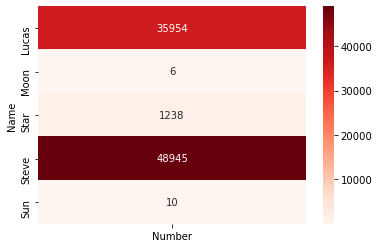

In [73]:
import seaborn as sns

# 이미지 크기 조정
sns.heatmap(data = df_select, annot = True, fmt = '.0f', cmap = 'Reds')